<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWK_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the Dataset / Creating the DataFrame
df = pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
# Renaiming te Columns
df.columns = ['Month', 'Passengers Number']
df

,Month,Passengers Number
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
# Setting Month as Index
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format= True)
df.set_index('Month', inplace=True)
df

/tmp/ipython-input-2288535607.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format= True)


,Passengers Number
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


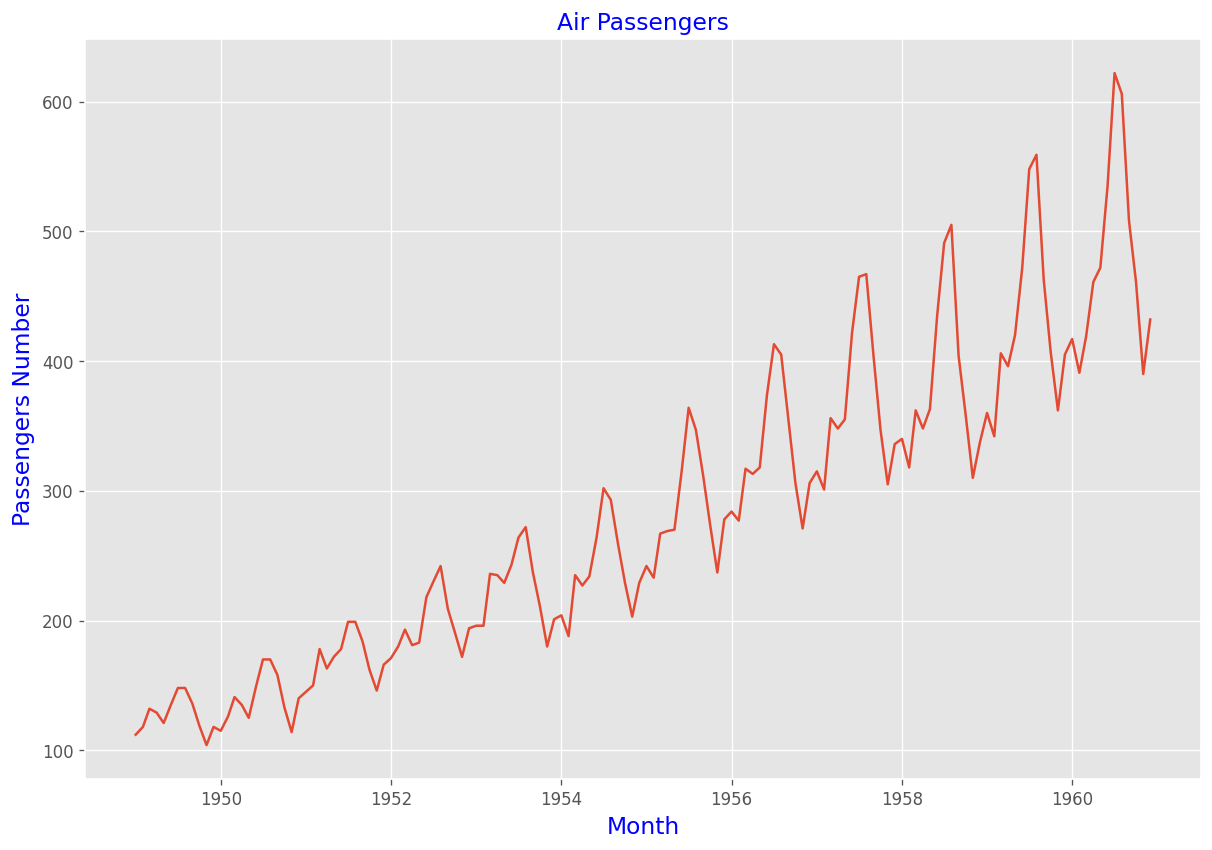

In [8]:
# Plotting the TS Dataseyt Air Passengers
plt.style.use('ggplot')
plt.figure(figsize=(12,8), dpi = 120)
plt.xlabel('Month', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()



In [9]:
# Let's Run the ADF and KPSS Tests to find out whether the TS is Stationary or Non-Stationary.
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(df['Passengers Number'])
print('ADF p-value',  adf_test[1])   # p-value > 0.05 ===> TS non-stationary
kpss_test = kpss(df['Passengers Number'])
print('KPSS p-value',  kpss_test[1])  # p-value < 0.05 ===> TS non-stationary

"""
In this case the TS being non-stationary, we can run ARIMA model to make it stationary.
AutoRegressive Integrated Moving Average (ARIMA)
AR (p) I(d) MA(q)
ADF = Augmented Dickey Fuller
KPSS = Kwiatkowski-Phillips-Schmidt-Shin
"""

ADF p-value 0.991880243437641
KPSS p-value 0.01


/tmp/ipython-input-556513160.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['Passengers Number'])


'\nIn this case the TS being non-stationary, we can run ARIMA model to make it stationary.\nAutoRegressive Integrated Moving Average (ARIMA)\nAR (p) I(d) MA(q)\nADF = Augmented Dickey Fuller\nKPSS = Kwiatkowski-Phillips-Schmidt-Shin\n'

<Figure size 1440x960 with 0 Axes>

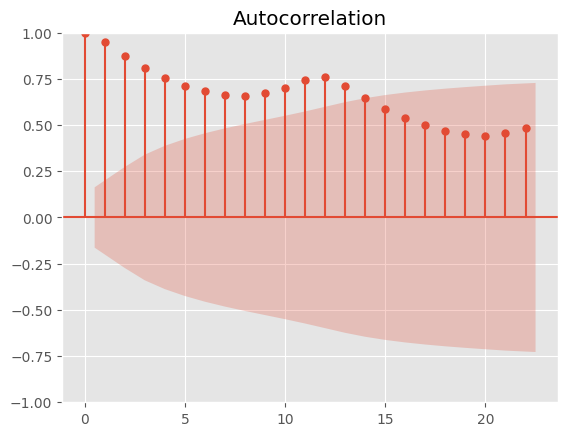

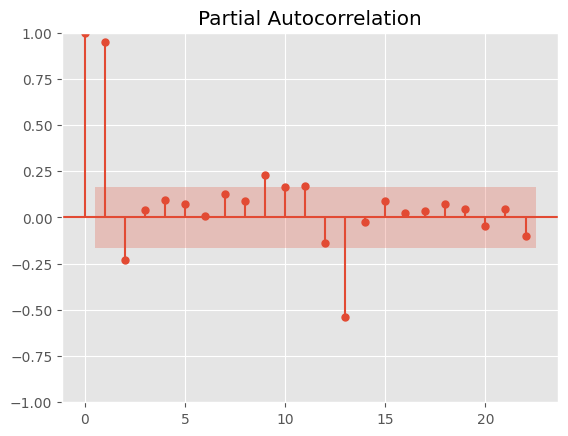

In [10]:
# Plot the ACF and PACF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8), dpi = 120)
plot_acf(df['Passengers Number']) # Several laggs are significant, therefore we will have to select between them and q = 1, 2, 3
plot_pacf(df['Passengers Number']) # Several laggs are significant, therefore we will have to select between them and p = 1, 2, 3
plt.show()

<Figure size 1440x960 with 0 Axes>

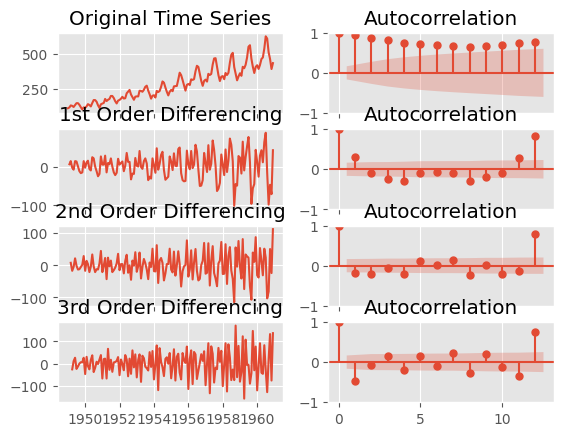

In [11]:
# Let's implement the differrncing of order d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8), dpi = 120)

# Plotting the Oiginal Time Series
fig, axes = plt. subplots(4, 2, sharex='col')
axes[0,0].plot(df['Passengers Number'])
axes[0,0].set_title('Original Time Series'); axes[0,0].set_title('Original Time Series')
plot_acf(df['Passengers Number'], lags = 12, ax = axes[0,1])

# Differencing 1st Order
axes[1,0].plot(df['Passengers Number'].diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Passengers Number'].diff().dropna(), lags = 12, ax = axes[1,1])  #

"""
 From the plots, differencing of order 1 is sufficient to make the TS stationary. Therefore d= 1
 Additionally, we have thge different values to plot our ARIMA(p,d,q) and they are:
 p = 1, 2, 3
 d = 1
 q = 1, 2, 3
ARIMA (1,1,0) - ARIMA(0,1,1) - ARIMA(0,1,2) - ARIMA(2,1,0), ARIMA(1,1,1) - ARIMA(1,1,2) - ARIMA(2,1,1) - ARIMA(2,1,2)
 """

# Differencing 2nd Order
axes[2,0].plot(df['Passengers Number'].diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().dropna(), lags = 12, ax = axes[2,1])

# 3rd order Differencing
axes[3,0].plot(df['Passengers Number'].diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(df['Passengers Number'].diff().diff().diff().dropna(), lags = 12, ax = axes[3,1])

plt.show()

In [12]:
# Let's plot different ARIMA models and select the best one based on the values of AIC and BIC
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Passengers Number'], order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Wed, 14 Jan 2026   AIC                           1401.852
Time:                        11:49:41   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.42   Prob(JB):                         0.09
Heteroskedasticity (H):               8.35   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Passengers Number'], order = (0,1,1))
model_fit = model.fit()
model_fit.summary()
"""
Comparing the ARIMA (p,d,q) models is based on the values of AIC, BIC, and HQIC and the smaller the better the model
Akaike Information Criteria (AIC):  Allows to find out whether the ARIMA model fit the dataset
Bayesian Information Criteria (BIC):  Allows to find out whether the ARIMA model deals effectively with complexity
Hannan-Quinn Information Criteria (HQIC):  Allows to find out whether the ARIMA model can select the best models.
For the model selection, the smaller these three values the better.
"""

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


'\nComparing the ARIMA (p,d,q) models is based on the values of AIC, BIC, and HQIC and the smaller the better the model\nAkaike Information Criteria (AIC):  Allows to find out whether the ARIMA model fit the dataset\nBayesian Information Criteria (BIC):  Allows to find out whether the ARIMA model deals effectively with complexity\nHannan-Quinn Information Criteria (HQIC):  Allows to find out whether the ARIMA model can select the best models. \nFor the model selection, the smaller these three values the better.\n'

In [14]:
# Creating the 3rd ARIMA model

model = ARIMA(df['Passengers Number'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Passengers Number   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 14 Jan 2026   AIC                           1394.683
Time:                        11:49:41   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Comparing several ARIMAs in one go
from statsmodels.tsa.arima.model import ARIMA
orders = [(1,1,0), (0,1,1), (0,1,2), (2,1,0), (1,1,1), (0,1,3), (3,1,0), (2,1,1)]
for order in orders:
    try:
        model = ARIMA(df['Passengers Number'], order = order)
        fit = model.fit()
        print(f'ARIMA{order}: AIC={fit.aic:.3f}, BIC={fit.bic:.3f}, HQIC={fit.hqic:.3f}')
    except Exception as e:
        print(f'ARIMA{order} failed:{e}')

"""
Given the 8 models of ARIMA tested, the ARIMA (2,1,1) is the best because of lower HQIC, BIC, and AIC values.

"""


ARIMA(1, 1, 0): AIC=1401.852, BIC=1407.778, HQIC=1404.260
ARIMA(0, 1, 1): AIC=1397.258, BIC=1403.183, HQIC=1399.665
ARIMA(0, 1, 2): AIC=1397.093, BIC=1405.982, HQIC=1400.705
ARIMA(2, 1, 0): AIC=1396.588, BIC=1405.476, HQIC=1400.200
ARIMA(1, 1, 1): AIC=1394.683, BIC=1403.571, HQIC=1398.294
ARIMA(0, 1, 3): AIC=1394.909, BIC=1406.761, HQIC=1399.725
ARIMA(3, 1, 0): AIC=1395.021, BIC=1406.872, HQIC=1399.837
ARIMA(2, 1, 1): AIC=1378.338, BIC=1390.190, HQIC=1383.154


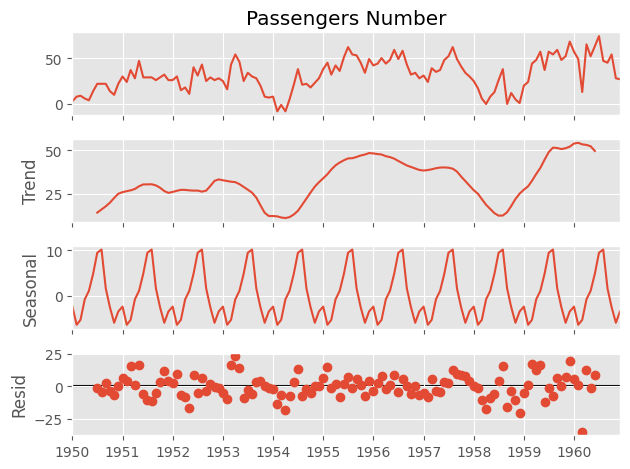

In [19]:
# Let's generate the related SARIMA model - In fact ARIMA does not deal with seasonality effectively. Therefore, we need to develop, seasonal arima or sarima.
import statsmodels.api as sm
diff_seasonal = df['Passengers Number'].diff(12).dropna()
decompose = sm.tsa.seasonal_decompose(diff_seasonal, period = 12)
decompose.plot()
plt.show()

"""
In relation to the SARIMA (P, D, Q, m) Model, we have to define P, D, Q and m
These values represent the seasonal order.
The dewcomposition brings forth a a Trend, Seasonal, and Residual bits/parts.
"""


In [20]:
# Developing first SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelsa = SARIMAX(df, order = (2,1,1), seasonal_order = (1,1,1,12))
modelsa_fit = modelsa.fit()
print(modelsa_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Passengers Number   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -503.124
Date:                            Wed, 14 Jan 2026   AIC                           1018.248
Time:                                    12:26:03   BIC                           1035.499
Sample:                                01-01-1949   HQIC                          1025.258
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5800      0.096      6.036      0.000       0.392       0.768
ar.L2          0.2287      0.103   

In [21]:
# Generating the 2nd ARIMA model
modelsa = SARIMAX(df, order = (2,1,1), seasonal_order = (2,1,1,12))
modelsa_fit = modelsa.fit()
print(modelsa_fit.summary())

"""
Finally, we can conclude that SARIMA model is better than the ARIMA model, based on theb three metrics (HQIC, BIC, and AIC).
"""

                                     SARIMAX Results                                      
Dep. Variable:                  Passengers Number   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.551
Date:                            Wed, 14 Jan 2026   AIC                           1013.102
Time:                                    12:29:02   BIC                           1033.229
Sample:                                01-01-1949   HQIC                          1021.281
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5295      0.101      5.239      0.000       0.331       0.728
ar.L2          0.2920      0.093   

In [22]:
# Making prediction/forecasting - In this regards, we have to splitt the Dataset between Training and Testing Sets
tot = len(df)
wind = 12
pasval = tot - wind



In [23]:
tot = len(df)
num_obs_ahead = 12
diff = tot - num_obs_ahead

train = df[:diff]
test = df[diff:]

In [24]:
# Let's use the best ARIMA found for Prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Passengers Number'], order = (2,1,1))
fit = model.fit()


In [25]:
# Let's Forecasting
forecast = fit.forecast(num_obs_ahead, alpha = 0.1)
confins = fit.get_forecast(num_obs_ahead).summary_frame()

In [27]:
# Creating Upper_bound and Lower_bound
forecast_values = pd.Series(forecast, index = test.index)
upper_bound = pd.Series(confins['mean_ci_upper'], index = test.index)
lower_bound =  pd.Series(confins['mean_ci_lower'], index = test.index)

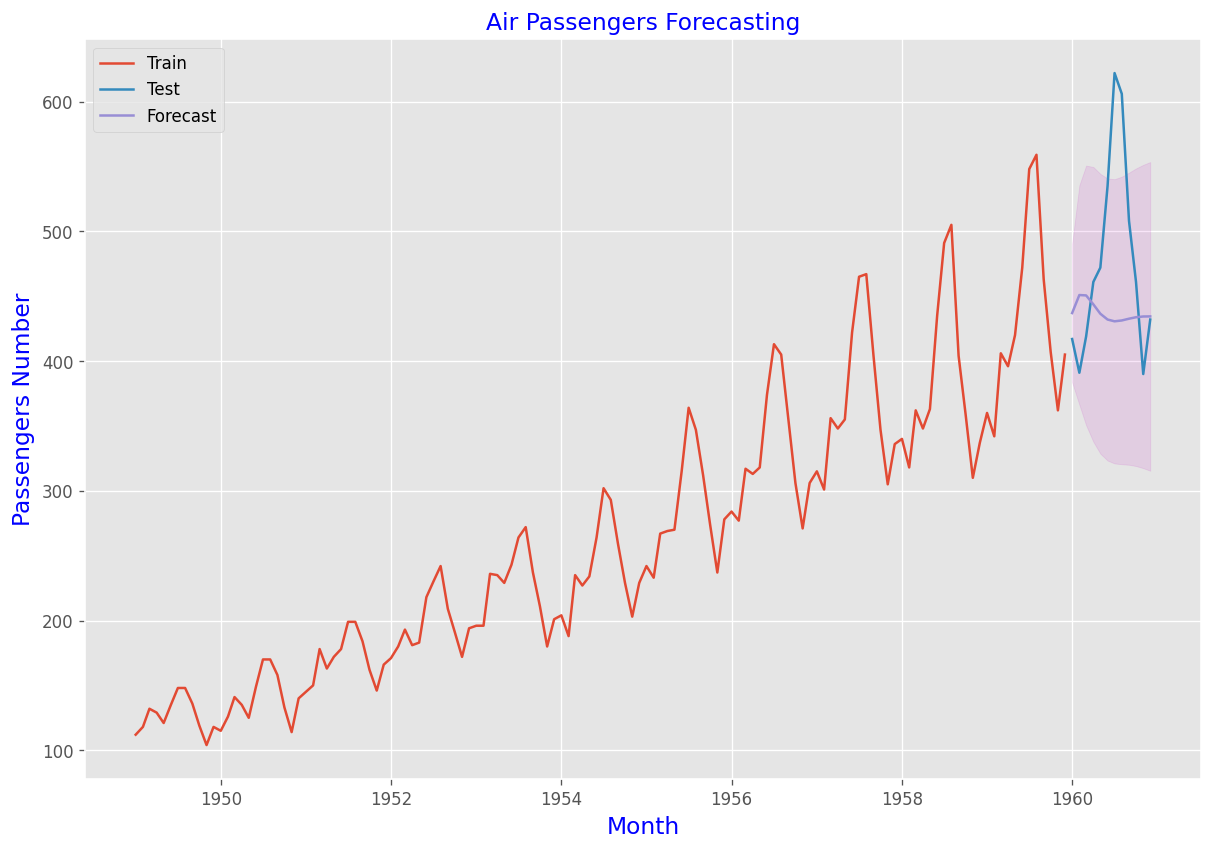

In [29]:
# Plotting the forecasted values
plt.style.use('ggplot')
plt.figure(figsize=(12,8), dpi = 120)
plt.plot(train['Passengers Number'], label = 'Train')
plt.plot(test['Passengers Number'], label = 'Test')
plt.plot(forecast_values, label = 'Forecast')
plt.xlabel('Month', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers Number', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers Forecasting', color = 'blue', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize':14})
plt.fill_between(upper_bound.index, upper_bound, lower_bound, color = 'm', alpha = 0.1)
plt.legend(loc = 'best')
plt.show()